# Tarea 5


MA5203 - Aprendizaje de Máquinas Probabilístico

Profesor: Felipe Tobar

Autor: Martín Cornejo

## Paquetes necesarios

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, classification, accuracy_score
import pdb

# P1 Experimento controlado

### a) 

In [2]:
n=1000
lambdaP = 4

mean_1 = np.array([0,lambdaP])
mean_2 = np.array([0,-lambdaP])
std = np.eye(2)*5

X0= np.random.multivariate_normal(mean_1, std, size = n)
X1= np.random.multivariate_normal(mean_2, std, size = n)

# creamos las etiquetas, las cuales tendrán valor 1 si pertenecen a la distribución X0 y 0 si pertenecen a X1
y_labels = np.zeros(2*n)
y_labels[:n] = 1

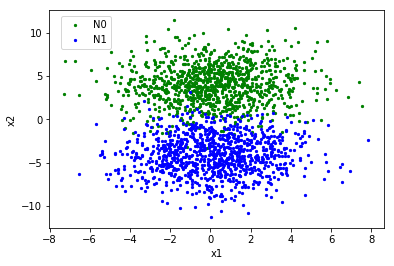

In [3]:
# pdb.set_trace()
plt.figure()
plt.scatter(X0[:,0],X0[:,1], c ='g', s=5)
plt.scatter(X1[:,0],X1[:,1], c ='b', s=5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(["N0","N1"], bbox_to_anchor=(0.2, 0.8))
# plt.savefig('train_test_data.pdf')

### b) 

In [4]:
Xtotal = np.concatenate((X0,X1))
X_train, X_test, y_train, y_test = train_test_split(Xtotal, y_labels, test_size = 0.25, random_state = 4)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = X_train[:75]
y_train = y_train[:75]
X_test = X_test[:25]
y_test = y_test[:25]

### Entrenamiento

### Error para distintos valores de C

In [5]:
c_array = np.arange(0.1, 10, 0.5)
results_test = []
results_train = []
errores_test = []
errores_train = []

for c_val in c_array:
    classifier = SVC(C=c_val, kernel = 'rbf', random_state = 0,verbose=False)
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    errores_test_aux = sum(np.diag(np.fliplr(classification.confusion_matrix(y_test, y_pred))))
    errores_test.append(errores_test_aux)
    results_test.append([y_test, y_pred])
    
    y_pred2 = classifier.predict(X_train)
    errores_train_aux = sum(np.diag(np.fliplr(classification.confusion_matrix(y_train, y_pred2))))
    errores_train.append(errores_train_aux)
    results_train.append([y_train, y_pred2])

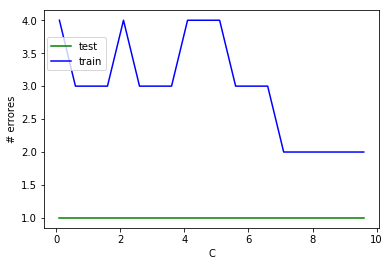

In [6]:
# pdb.set_trace()
plt.figure()
plt.plot(c_array,errores_test, 'g')
plt.plot(c_array,errores_train, 'b')
plt.xlabel("C")
plt.ylabel("# errores")
plt.legend(["test","train"], bbox_to_anchor=(0.2, 0.8))
# plt.savefig('train_test_data.pdf')